In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishmotwani/tomato")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tomato


In [2]:
import random
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os
import numpy as np
import torch
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
from torchvision import datasets



In [3]:
# Paths
base_path = Path("/kaggle/input/tomato")
train_dir = base_path / "train"
val_dir = base_path / "valid"

# Transform
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load full validation dataset
full_val_dataset = datasets.ImageFolder(val_dir, transform=transform)

# Decide split ratio (e.g., 50% val, 50% test)
val_ratio = 0.5
val_size = int(len(full_val_dataset) * val_ratio)
test_size = len(full_val_dataset) - val_size

# Set random seed for reproducibility
torch.manual_seed(42)

# Split into validation and test subsets
val_dataset, test_dataset = random_split(full_val_dataset, [val_size, test_size])

# Loaders
train_loader = DataLoader(datasets.ImageFolder(train_dir, transform=transform), batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Print info
print(f"Training samples: {len(train_loader.dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")


Training samples: 25851
Validation samples: 3341
Test samples: 3342


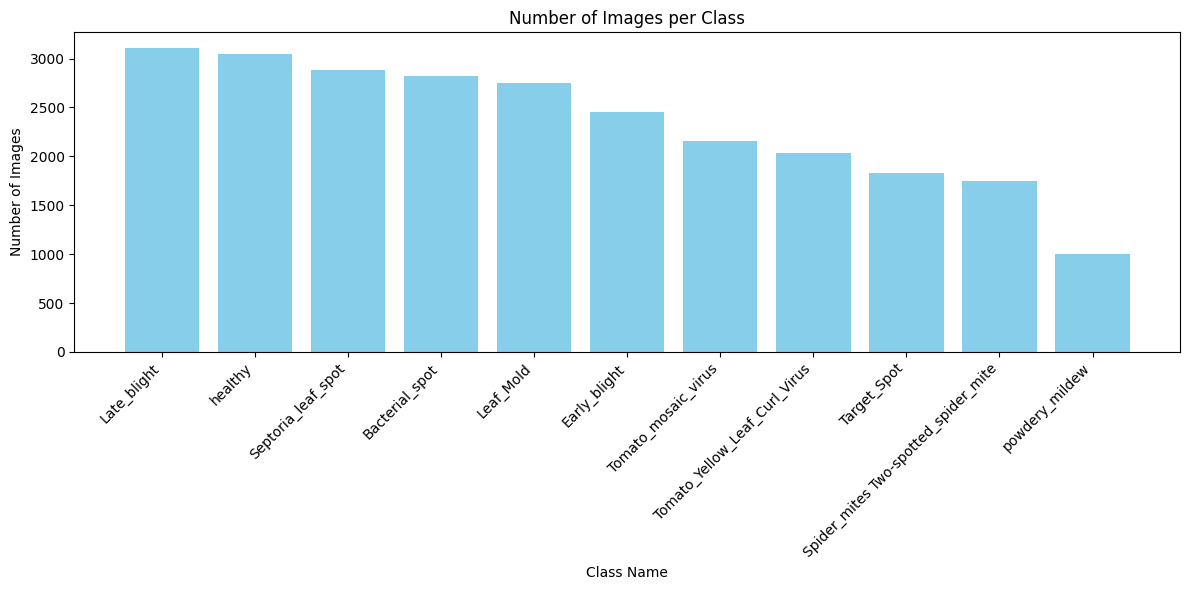

In [4]:
# path = Path("/kaggle/input/tomato/train")
# image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']

# for class_folder in path.iterdir():
#     if class_folder.is_dir():
#         count = 0
#         for ext in image_extensions:
#             count += len(list(class_folder.glob(ext)))
#         print(f"Class: {class_folder.name} - Images: {count}")
from pathlib import Path
import matplotlib.pyplot as plt

# Define the dataset path and image extensions
path = Path("/kaggle/input/tomato/train")
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']

# Dictionary to store class names and image counts
class_counts = {}

# Iterate through each class folder and count images
for class_folder in path.iterdir():
    if class_folder.is_dir():
        count = 0
        for ext in image_extensions:
            count += len(list(class_folder.glob(ext)))
        class_counts[class_folder.name] = count

# Sort the dictionary for better visualization
class_counts = dict(sorted(class_counts.items(), key=lambda item: item[1], reverse=True))

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.tight_layout()
plt.show()


Random image path: /kaggle/input/tomato/train/Late_blight/2e8f61d8-0d5d-46e3-a597-ede96855a4fe___RS_Late.B 5352.JPG
Image class: Late_blight
Image height: 256
Image width: 256


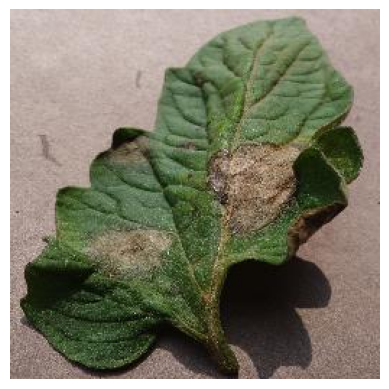

In [5]:
random.seed(13)

image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']

image_path_list = []
for ext in image_extensions:
    """Find all image files with the current extension (.jpg, .png, etc.) 
    in all class subfolders inside the train folder, and add them to image_path_list"""
    image_path_list.extend(path.glob(f"*/*{ext[1:]}"))

if not image_path_list:
    print("No images found! Check your path and extensions.")
else:
    random_image_path = random.choice(image_path_list)
    image_class = random_image_path.parent.stem
    img = Image.open(random_image_path)

    print(f"Random image path: {random_image_path}")
    print(f"Image class: {image_class}")
    print(f"Image height: {img.height}") 
    print(f"Image width: {img.width}")

    # Display inline image
    plt.imshow(img)
    plt.axis('off')
    plt.show()


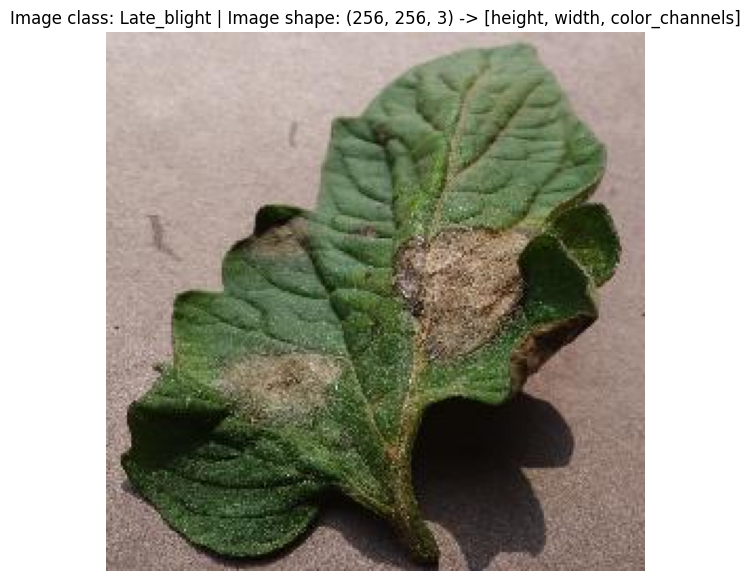

In [6]:
# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

In [7]:
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(224, 224)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

In [8]:
data_transform

Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

In [9]:
data_transform(img)

tensor([[[0.7294, 0.7569, 0.7686,  ..., 0.8157, 0.8196, 0.8235],
         [0.7373, 0.7451, 0.7451,  ..., 0.8196, 0.8275, 0.8314],
         [0.7373, 0.7294, 0.7255,  ..., 0.8157, 0.8235, 0.8314],
         ...,
         [0.5294, 0.5412, 0.5490,  ..., 0.4980, 0.5137, 0.5765],
         [0.5176, 0.4863, 0.5294,  ..., 0.5451, 0.5529, 0.5255],
         [0.4706, 0.4745, 0.5216,  ..., 0.5804, 0.6000, 0.5059]],

        [[0.6627, 0.6902, 0.7020,  ..., 0.7608, 0.7647, 0.7686],
         [0.6706, 0.6784, 0.6784,  ..., 0.7647, 0.7725, 0.7765],
         [0.6706, 0.6627, 0.6588,  ..., 0.7608, 0.7686, 0.7765],
         ...,
         [0.4510, 0.4627, 0.4706,  ..., 0.4235, 0.4392, 0.5020],
         [0.4392, 0.4078, 0.4510,  ..., 0.4706, 0.4784, 0.4510],
         [0.3922, 0.3961, 0.4431,  ..., 0.5059, 0.5255, 0.4314]],

        [[0.6353, 0.6627, 0.6745,  ..., 0.7490, 0.7529, 0.7569],
         [0.6431, 0.6510, 0.6510,  ..., 0.7529, 0.7608, 0.7647],
         [0.6431, 0.6353, 0.6314,  ..., 0.7490, 0.7569, 0.

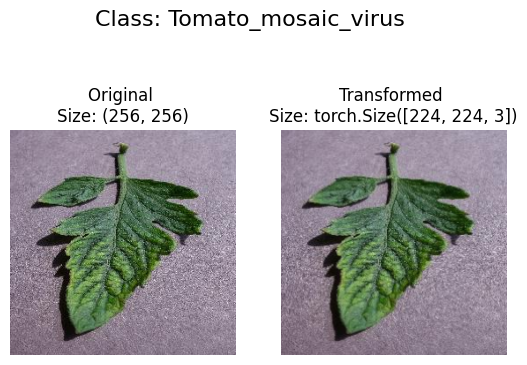

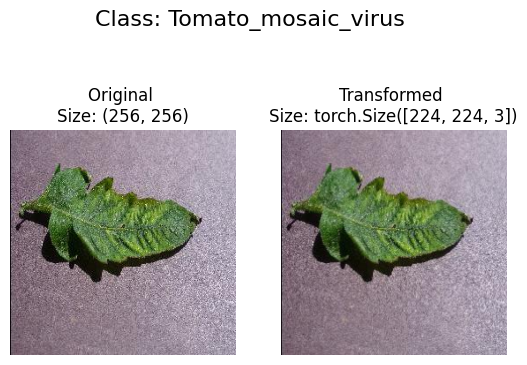

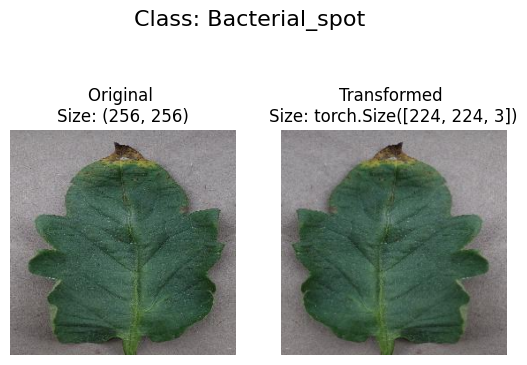

In [10]:
def plot_transformed_images(image_paths, transform, n=3, seed=22):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3, seed=None)

In [11]:
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [12]:
# Correct path to training directory
train_dir = Path("/kaggle/input/tomato/train")
target_directory = train_dir

print(f"target_directory: {target_directory}")

# Get class names (folder names in train directory)
class_names_found = sorted([entry.name for entry in os.scandir(target_directory) if entry.is_dir()])
print(f"class_names_found: {class_names_found}")

target_directory: /kaggle/input/tomato/train
class_names_found: ['Bacterial_spot', 'Early_blight', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Spider_mites Two-spotted_spider_mite', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus', 'healthy', 'powdery_mildew']


In [13]:
 list(os.scandir(target_directory))

[<DirEntry 'Late_blight'>,
 <DirEntry 'Tomato_Yellow_Leaf_Curl_Virus'>,
 <DirEntry 'Septoria_leaf_spot'>,
 <DirEntry 'Early_blight'>,
 <DirEntry 'Spider_mites Two-spotted_spider_mite'>,
 <DirEntry 'powdery_mildew'>,
 <DirEntry 'healthy'>,
 <DirEntry 'Bacterial_spot'>,
 <DirEntry 'Target_Spot'>,
 <DirEntry 'Tomato_mosaic_virus'>,
 <DirEntry 'Leaf_Mold'>]

In [14]:
train_dir = "/kaggle/input/tomato/train"
test_dir = "/kaggle/input/tomato/valid"
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 25851
    Root location: /kaggle/input/tomato/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 6683
    Root location: /kaggle/input/tomato/valid
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [15]:
#get class names as list
class_names = train_data.classes
class_names

['Bacterial_spot',
 'Early_blight',
 'Late_blight',
 'Leaf_Mold',
 'Septoria_leaf_spot',
 'Spider_mites Two-spotted_spider_mite',
 'Target_Spot',
 'Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato_mosaic_virus',
 'healthy',
 'powdery_mildew']

In [16]:
#check the len of the train and test data
len(train_data), len(test_data)

(25851, 6683)

In [17]:
#turning the train and test datasets to the dataloader
from torch.utils.data import DataLoader

BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, num_workers=1, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x77fd68b6b810>,
 <torch.utils.data.dataloader.DataLoader at 0x77fd67068b90>)

In [18]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [19]:
from torchvision import transforms 

train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

Found 25851 images.


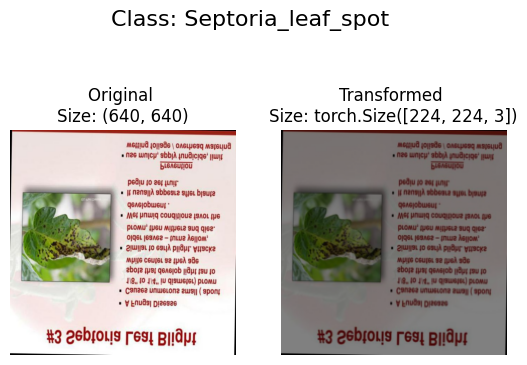

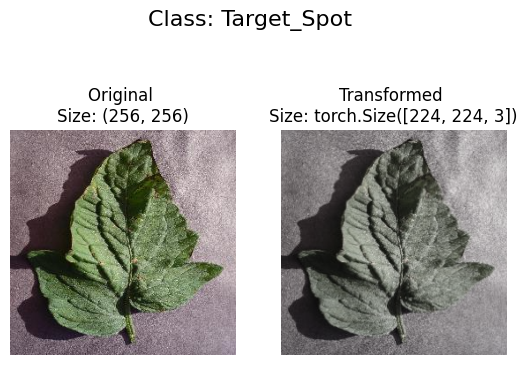

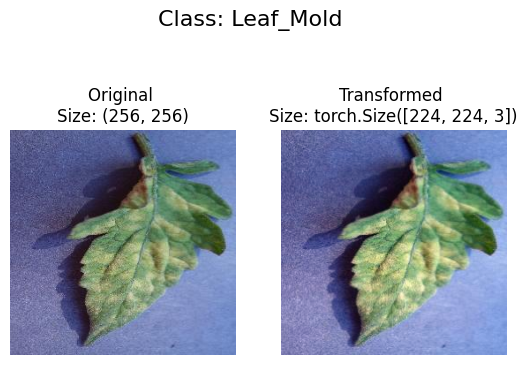

In [20]:
from pathlib import Path

# Define the base path to the training directory
path = Path('/kaggle/input/tomato/train')

# Supported extensions
extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']

# Use rglob to recursively find images
image_path_list = []
for ext in extensions:
    image_path_list.extend(path.rglob(ext))  # rglob works recursively

# Remove duplicates if any
image_path_list = list(set(image_path_list))

print(f"Found {len(image_path_list)} images.")

# Plot if enough images
if len(image_path_list) >= 3:
    plot_transformed_images(
        image_paths=image_path_list,
        transform=train_transforms,
        n=3,
        seed=None
    )
else:
    print(f"Not enough images found. Only {len(image_path_list)} available.")


In [21]:
#create simple transforms

simple_transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

In [22]:
#load and transform data

import os
from torch.utils.data import DataLoader
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

#setup batchsize and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

#create dataloaders
train_dataloader_simple = DataLoader(train_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=True,
                                    num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(test_data_simple,
                                   batch_size=BATCH_SIZE,
                                   shuffle=False,
                                   num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 4 workers.


(<torch.utils.data.dataloader.DataLoader at 0x77fd6585b090>,
 <torch.utils.data.dataloader.DataLoader at 0x77fd65853f10>)

In [23]:
import torch
import torch.nn as nn


class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        
        # Improved conv_block_1 with batch norm and dropout
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(input_shape, hidden_units, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout2d(0.1)  # Light dropout in early layers
        )
        
        # Improved conv_block_2 with more channels
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units * 2, kernel_size=3, padding=1),  # Double channels
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.Conv2d(hidden_units * 2, hidden_units * 2, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units * 2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout2d(0.2)
        )
        
        # Improved conv_block_3 with even more channels
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(hidden_units * 2, hidden_units * 4, kernel_size=3, padding=1),  # Quadruple channels
            nn.BatchNorm2d(hidden_units * 4),
            nn.ReLU(),
            nn.Conv2d(hidden_units * 4, hidden_units * 4, kernel_size=3, padding=1),
            nn.BatchNorm2d(hidden_units * 4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout2d(0.3)
        )
        
        # Adaptive pooling to handle different input sizes
        self.adaptive_pool = nn.AdaptiveAvgPool2d((4, 4))  # Fixed 4x4 output
        
        # Improved classifier with multiple layers
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Now using: hidden_units * 4 * 4 * 4 (channels * height * width)
            nn.Linear(hidden_units * 4 * 4 * 4, hidden_units * 8),
            nn.BatchNorm1d(hidden_units * 8),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(hidden_units * 8, hidden_units * 4),
            nn.BatchNorm1d(hidden_units * 4),
            nn.ReLU(),
            nn.Dropout(0.4),
            
            nn.Linear(hidden_units * 4, output_shape)
        )
    
    def forward(self, x):
        x = self.conv_block_1(x)
        print("After conv_block_1:", x.shape)
        x = self.conv_block_2(x)
        print("After conv_block_2:", x.shape)
        x = self.conv_block_3(x)
        print("After conv_block_3:", x.shape)
        x = self.adaptive_pool(x)  # Add adaptive pooling
        print("After adaptive_pool:", x.shape)
        x = self.classifier(x)
        print("After classifier:", x.shape)
        return x


In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Set manual seed for reproducibility
torch.manual_seed(42)

# Instantiate the model
model_0 = TinyVGG(
    input_shape=3,
    hidden_units=16,
    output_shape=len(class_names)  # make sure class_names is defined
).to(device)

model_0  # Will print model architecture


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.1, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

In [25]:
#get a single image batch

image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [26]:
#create a train step
def train_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer): 

    #put model in train mode
    model.train()
    
    #setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    #loop through dataloader and data batches
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        
        #forward pass
        y_pred = model(X)
        
        #calculate and accumulate loss
        loss = loss_fn(y_pred,y)
        train_loss += loss.item()
        
        #optimizer zero grad
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #calculate and accumulate accuracy metrics across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1),dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    #adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [27]:
def test_step(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module):
    #put model in eval
    model.eval()
    test_loss, test_acc = 0, 0
    
    #turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [28]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        # Ensure all data is moved to CPU and converted to float for storage
        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
from timeit import default_timer as timer

torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 25

model_0 = TinyVGG(input_shape=3,
                 hidden_units=32,
                 output_shape = len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

start_time = timer()

model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

# Save the trained model's state_dict to a .pkl file
torch.save(model_0.state_dict(), "model_010_state_dict.pkl")


  0%|          | 0/25 [00:00<?, ?it/s]

After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112

In [34]:
from sklearn.metrics import classification_report

# Put model in evaluation mode
model_0.eval()

# Store predictions and true labels
y_preds = []
y_true = []

with torch.inference_mode():
    for X, y in test_dataloader_simple:
        X, y = X.to(device), y.to(device) 
        y_logits = model_0(X)
        y_pred = torch.argmax(y_logits, dim=1)

        y_preds.extend(y_pred.cpu().numpy())
        y_true.extend(y.cpu().numpy())

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_preds, target_names=train_data.classes))


After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112

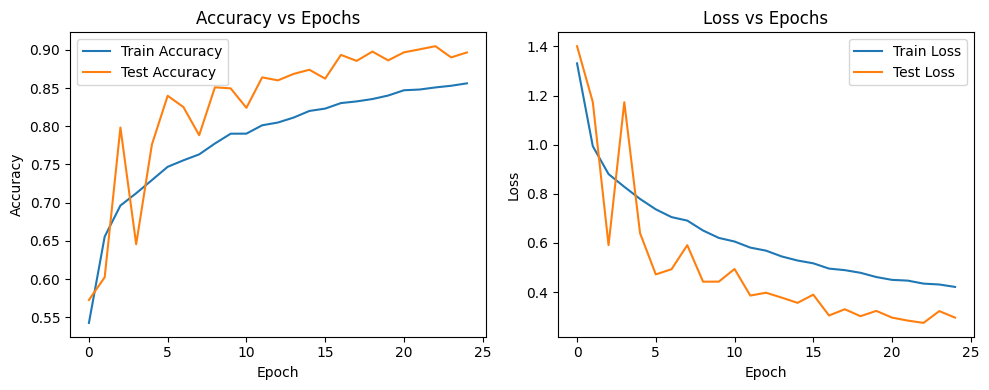

In [35]:
# Accuracy vs Epoch and Loss vs Epoch Plot

import matplotlib.pyplot as plt

# Plot Accuracy vs Epoch
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(model_0_results["train_acc"], label="Train Accuracy")
plt.plot(model_0_results["test_acc"], label="Test Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plot Loss vs Epoch
plt.subplot(1, 2, 2)
plt.plot(model_0_results["train_loss"], label="Train Loss")
plt.plot(model_0_results["test_loss"], label="Test Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112])
After conv_block_2: torch.Size([32, 64, 56, 56])
After conv_block_3: torch.Size([32, 128, 28, 28])
After adaptive_pool: torch.Size([32, 128, 4, 4])
After classifier: torch.Size([32, 11])
After conv_block_1: torch.Size([32, 32, 112, 112

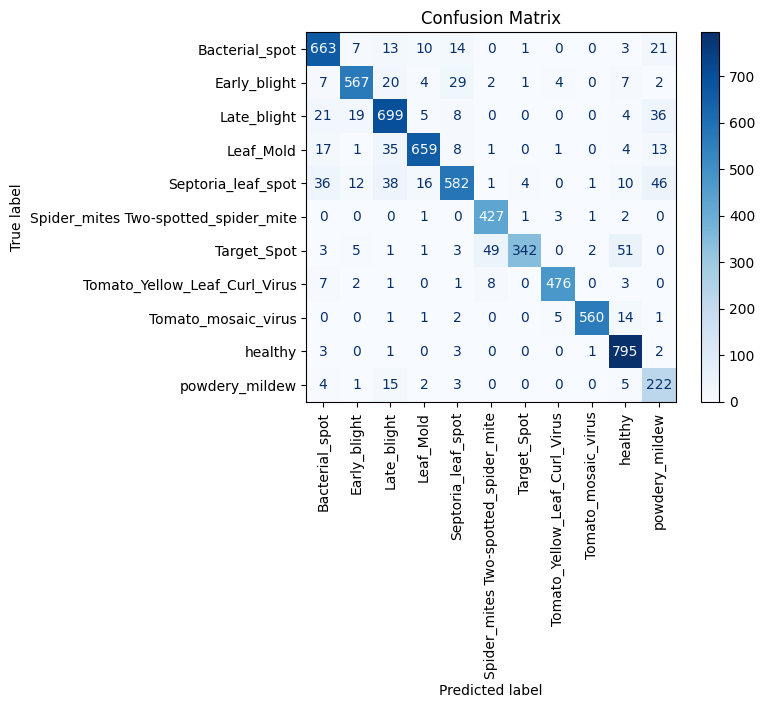

In [36]:
# Confusion Matrix on Test Set 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import torch
import numpy as np

def get_preds_and_labels(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y_logits = model(X)
            y_pred = torch.argmax(y_logits, dim=1)
            all_preds.append(y_pred.cpu().numpy())
            all_labels.append(y.cpu().numpy())
    return np.concatenate(all_preds), np.concatenate(all_labels)

# Get predictions and true labels
y_pred, y_true = get_preds_and_labels(model_0, test_dataloader_simple, device)

# Generate and display the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_data.classes)
disp.plot(xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
class_names = train_data_simple.classes  # This gets the alphabetically sorted names
print("Class names in correct order:", class_names)